In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/cats-dataset/cats_dataset.csv')

print(df.head())
print(df.describe())
print(df.describe(include=['object']))
print(df.isnull().sum())

              Breed  Age (Years)  Weight (kg)          Color  Gender
0      Russian Blue           19            7  Tortoiseshell  Female
1  Norwegian Forest           19            9  Tortoiseshell  Female
2         Chartreux            3            3          Brown  Female
3           Persian           13            6          Sable  Female
4           Ragdoll           10            8          Tabby    Male
       Age (Years)  Weight (kg)
count  1000.000000   1000.00000
mean     10.210000      5.55000
std       5.535751      2.22676
min       1.000000      2.00000
25%       5.000000      4.00000
50%      10.000000      6.00000
75%      15.000000      7.00000
max      19.000000      9.00000
          Breed     Color Gender
count      1000      1000   1000
unique       30        15      2
top     Ragdoll  Tricolor   Male
freq         51        73    505
Breed          0
Age (Years)    0
Weight (kg)    0
Color          0
Gender         0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


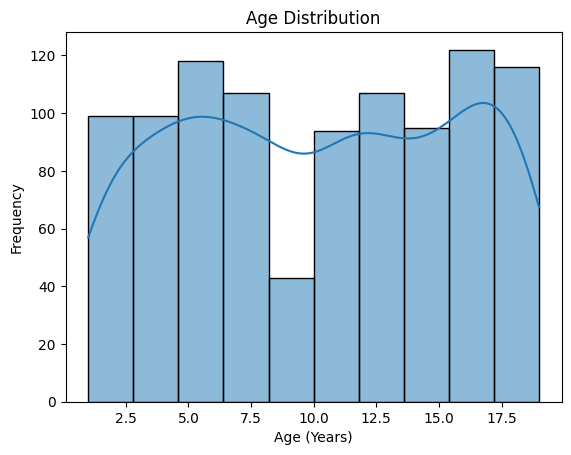

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


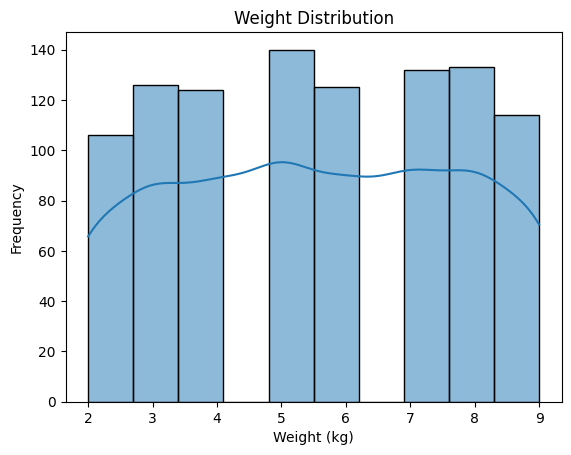

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# age distribution
sns.histplot(df['Age (Years)'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

# weight distribution
sns.histplot(df['Weight (kg)'], bins=10, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()


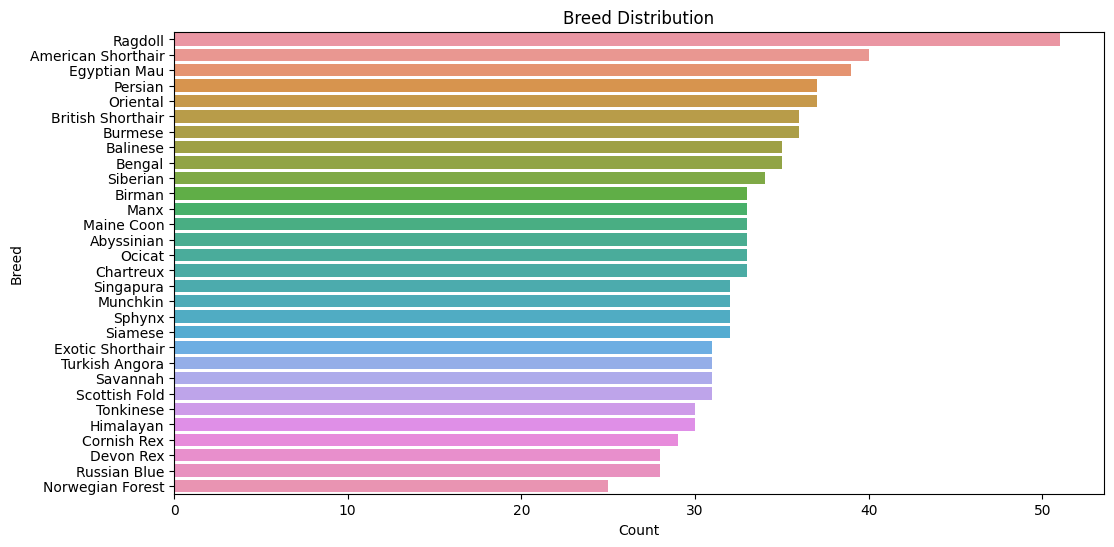

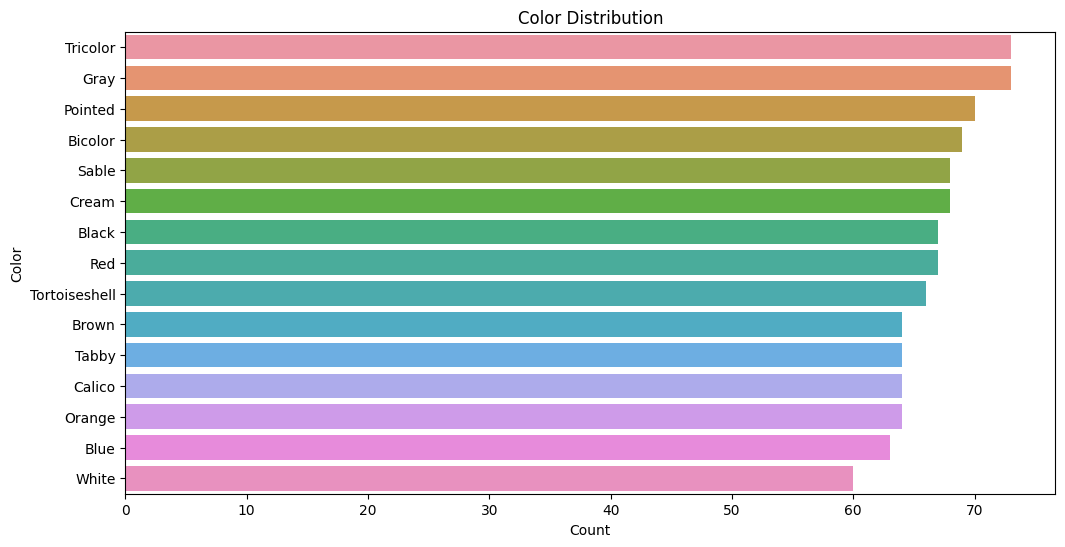

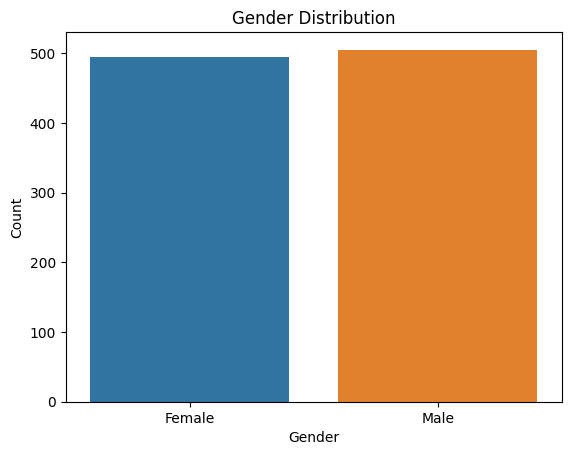

In [3]:
# breed distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Breed'], order=df['Breed'].value_counts().index)
plt.title('Breed Distribution')
plt.xlabel('Count')
plt.ylabel('Breed')
plt.show()

# color distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Color'], order=df['Color'].value_counts().index)
plt.title('Color Distribution')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

# gender distribution
sns.countplot(x=df['Gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


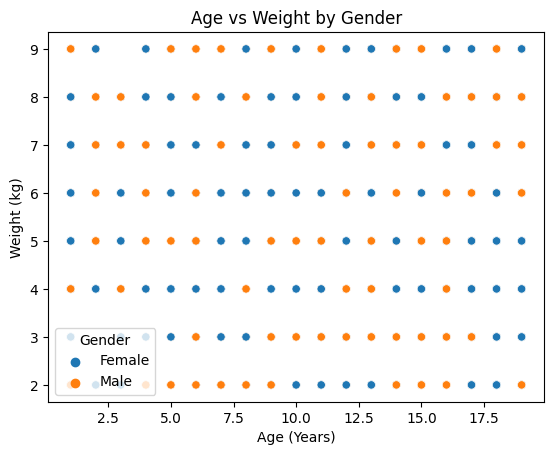

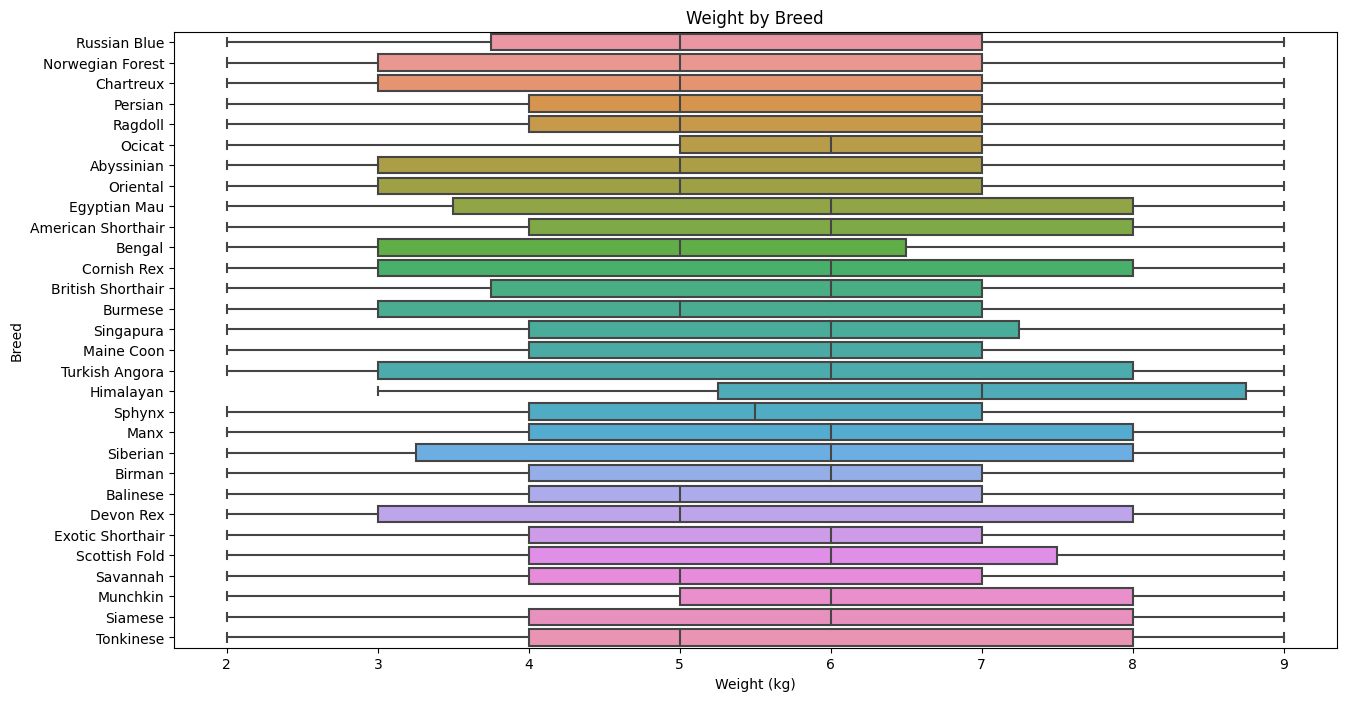

In [4]:
# age vs Weight
sns.scatterplot(data=df, x='Age (Years)', y='Weight (kg)', hue='Gender')
plt.title('Age vs Weight by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('Weight (kg)')
plt.show()

# boxplot of Weight by Breed
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Weight (kg)', y='Breed')
plt.title('Weight by Breed')
plt.xlabel('Weight (kg)')
plt.ylabel('Breed')
plt.show()


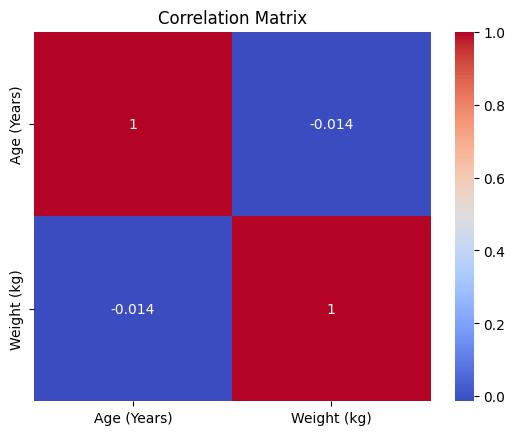

In [5]:
# correlation matrix
correlation_matrix = df[['Age (Years)', 'Weight (kg)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

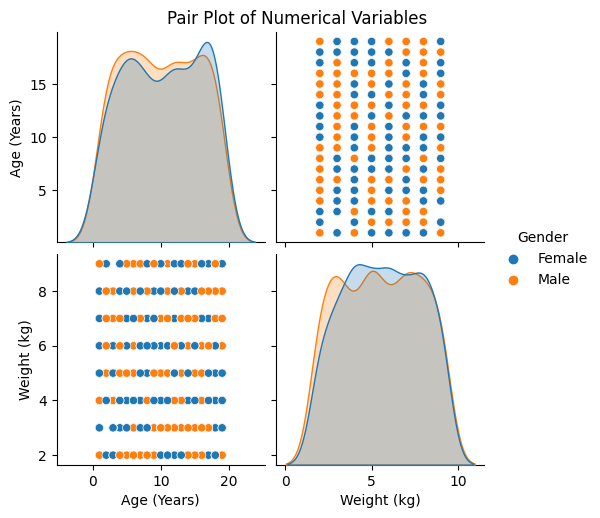

In [6]:
sns.pairplot(df, hue='Gender', vars=['Age (Years)', 'Weight (kg)'])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


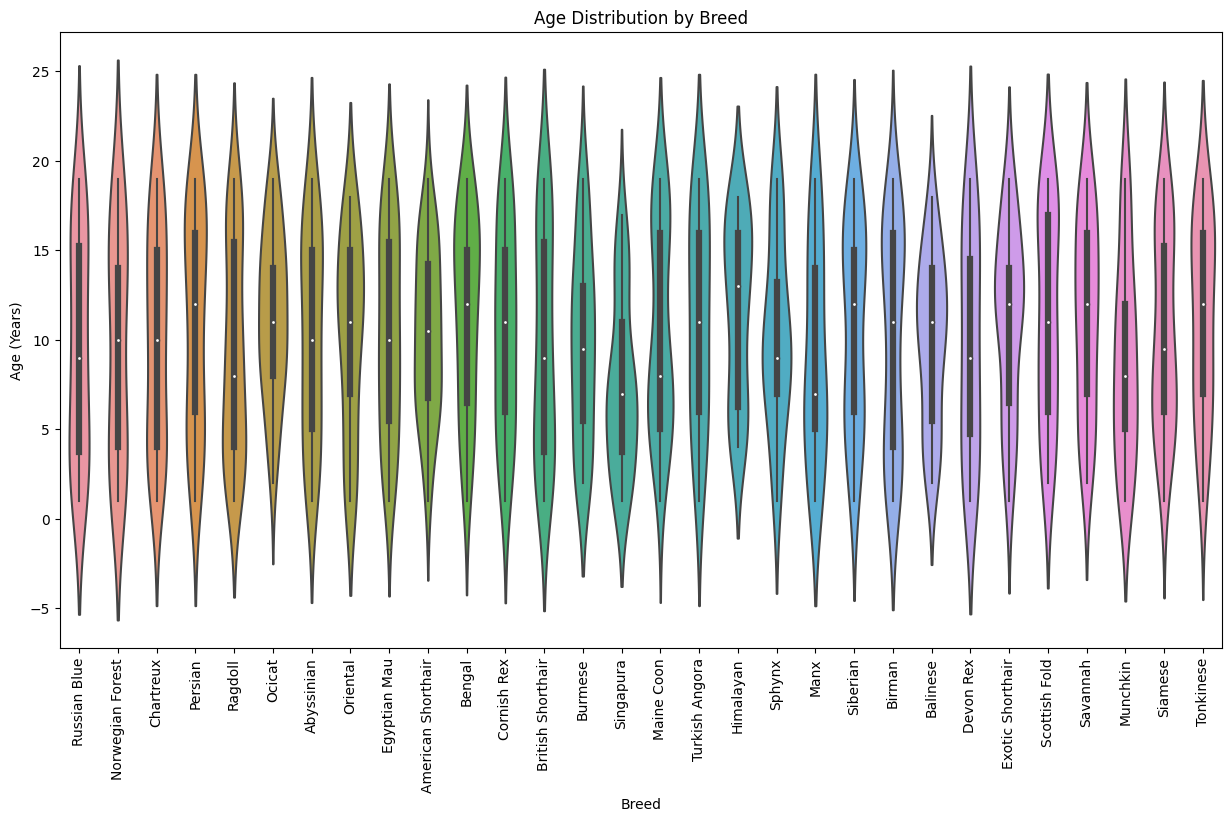

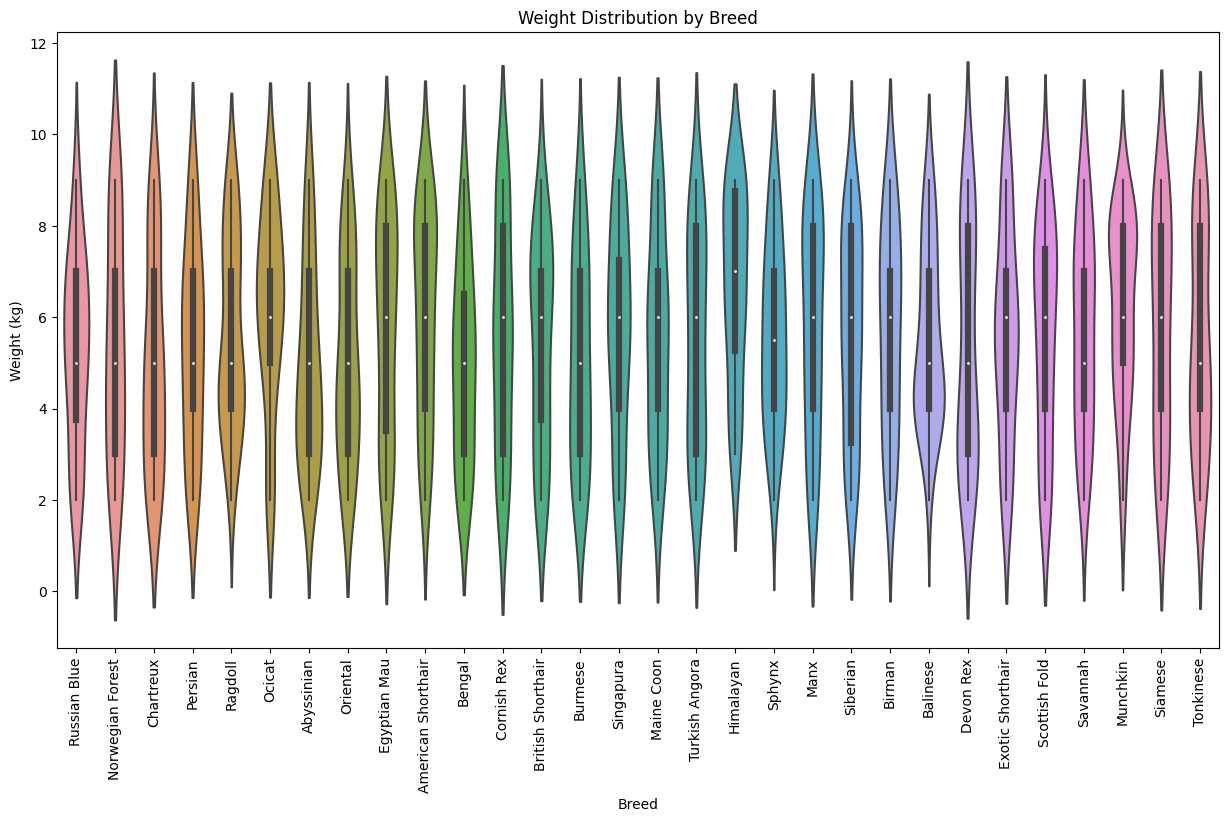

In [7]:
# violin plot for Age by Breed
plt.figure(figsize=(15, 8))
sns.violinplot(data=df, x='Breed', y='Age (Years)')
plt.title('Age Distribution by Breed')
plt.xlabel('Breed')
plt.ylabel('Age (Years)')
plt.xticks(rotation=90)
plt.show()

# violin plot for Weight by Breed
plt.figure(figsize=(15, 8))
sns.violinplot(data=df, x='Breed', y='Weight (kg)')
plt.title('Weight Distribution by Breed')
plt.xlabel('Breed')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90)
plt.show()


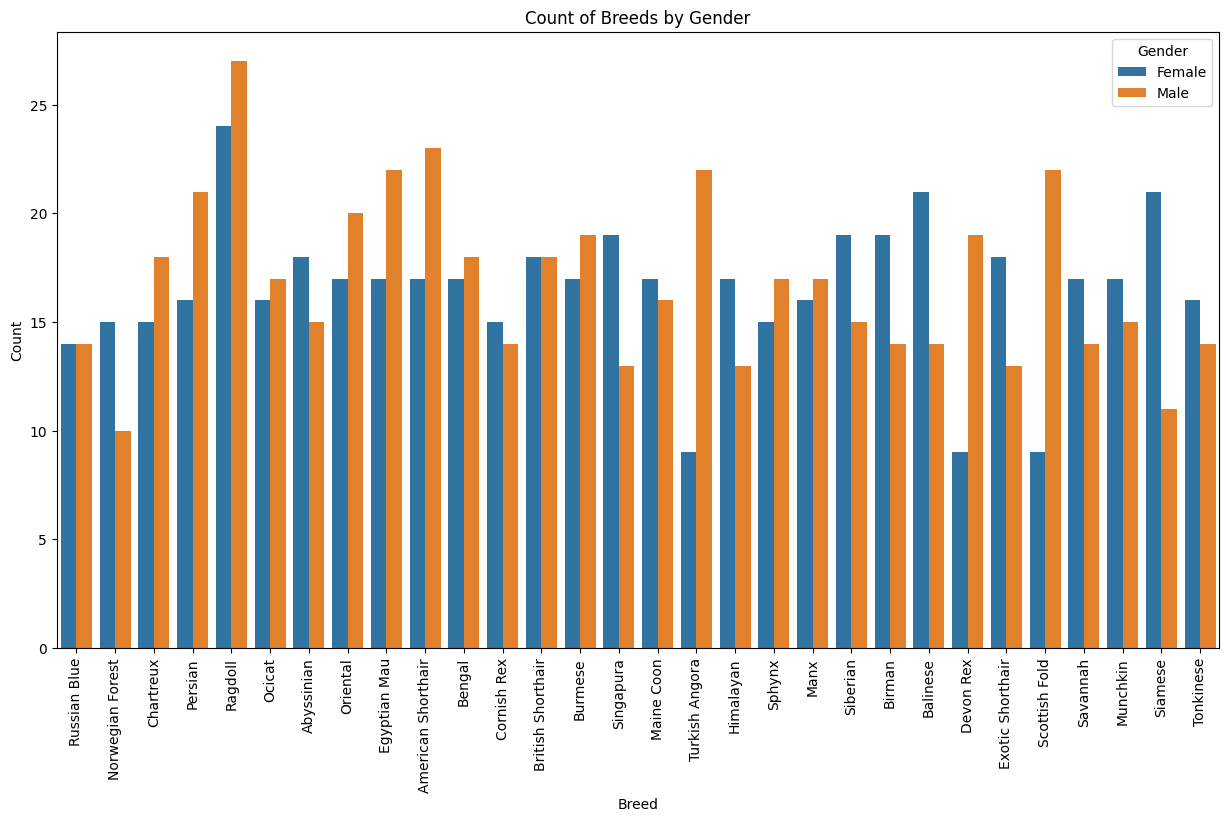

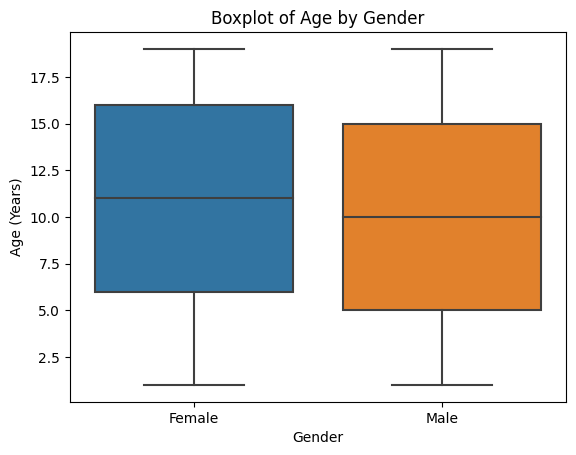

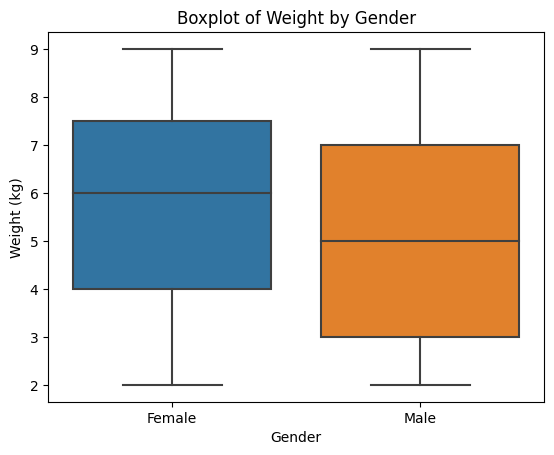

In [8]:
# count plot of Breed by Gender
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Breed', hue='Gender')
plt.title('Count of Breeds by Gender')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# boxplot of Age by Gender
sns.boxplot(data=df, x='Gender', y='Age (Years)')
plt.title('Boxplot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age (Years)')
plt.show()

# boxplot of Weight by Gender
sns.boxplot(data=df, x='Gender', y='Weight (kg)')
plt.title('Boxplot of Weight by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.show()


In [9]:
# average Age and Weight by Breed and Gender
grouped_summary = df.groupby(['Breed', 'Gender']).agg({'Age (Years)': 'mean', 'Weight (kg)': 'mean'}).reset_index()
print(grouped_summary)

# pivot table for detailed grouped analysis
pivot_table = pd.pivot_table(df, values=['Age (Years)', 'Weight (kg)'], index=['Breed'], columns=['Gender'], aggfunc={'Age (Years)': 'mean', 'Weight (kg)': 'mean'})
print(pivot_table)


                 Breed  Gender  Age (Years)  Weight (kg)
0           Abyssinian  Female    10.055556     5.500000
1           Abyssinian    Male    10.400000     4.266667
2   American Shorthair  Female    10.235294     6.235294
3   American Shorthair    Male    10.347826     5.782609
4             Balinese  Female    10.142857     5.619048
5             Balinese    Male     9.714286     5.285714
6               Bengal  Female    11.352941     5.294118
7               Bengal    Male    11.388889     4.722222
8               Birman  Female    11.526316     6.157895
9               Birman    Male     8.214286     5.071429
10   British Shorthair  Female    11.500000     5.388889
11   British Shorthair    Male     7.833333     5.388889
12             Burmese  Female     9.705882     5.411765
13             Burmese    Male     9.578947     4.789474
14           Chartreux  Female    12.000000     5.133333
15           Chartreux    Male     8.277778     4.888889
16         Cornish Rex  Female 

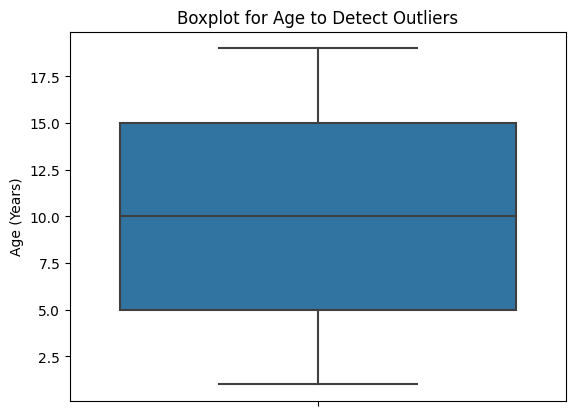

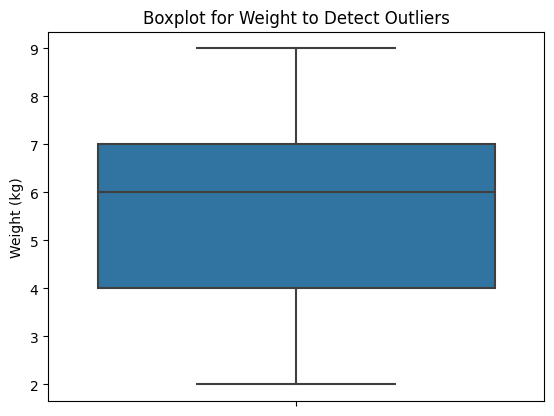

In [10]:
# boxplot to detect outliers in Age
sns.boxplot(data=df, y='Age (Years)')
plt.title('Boxplot for Age to Detect Outliers')
plt.show()

# boxplot to detect outliers in Weight
sns.boxplot(data=df, y='Weight (kg)')
plt.title('Boxplot for Weight to Detect Outliers')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

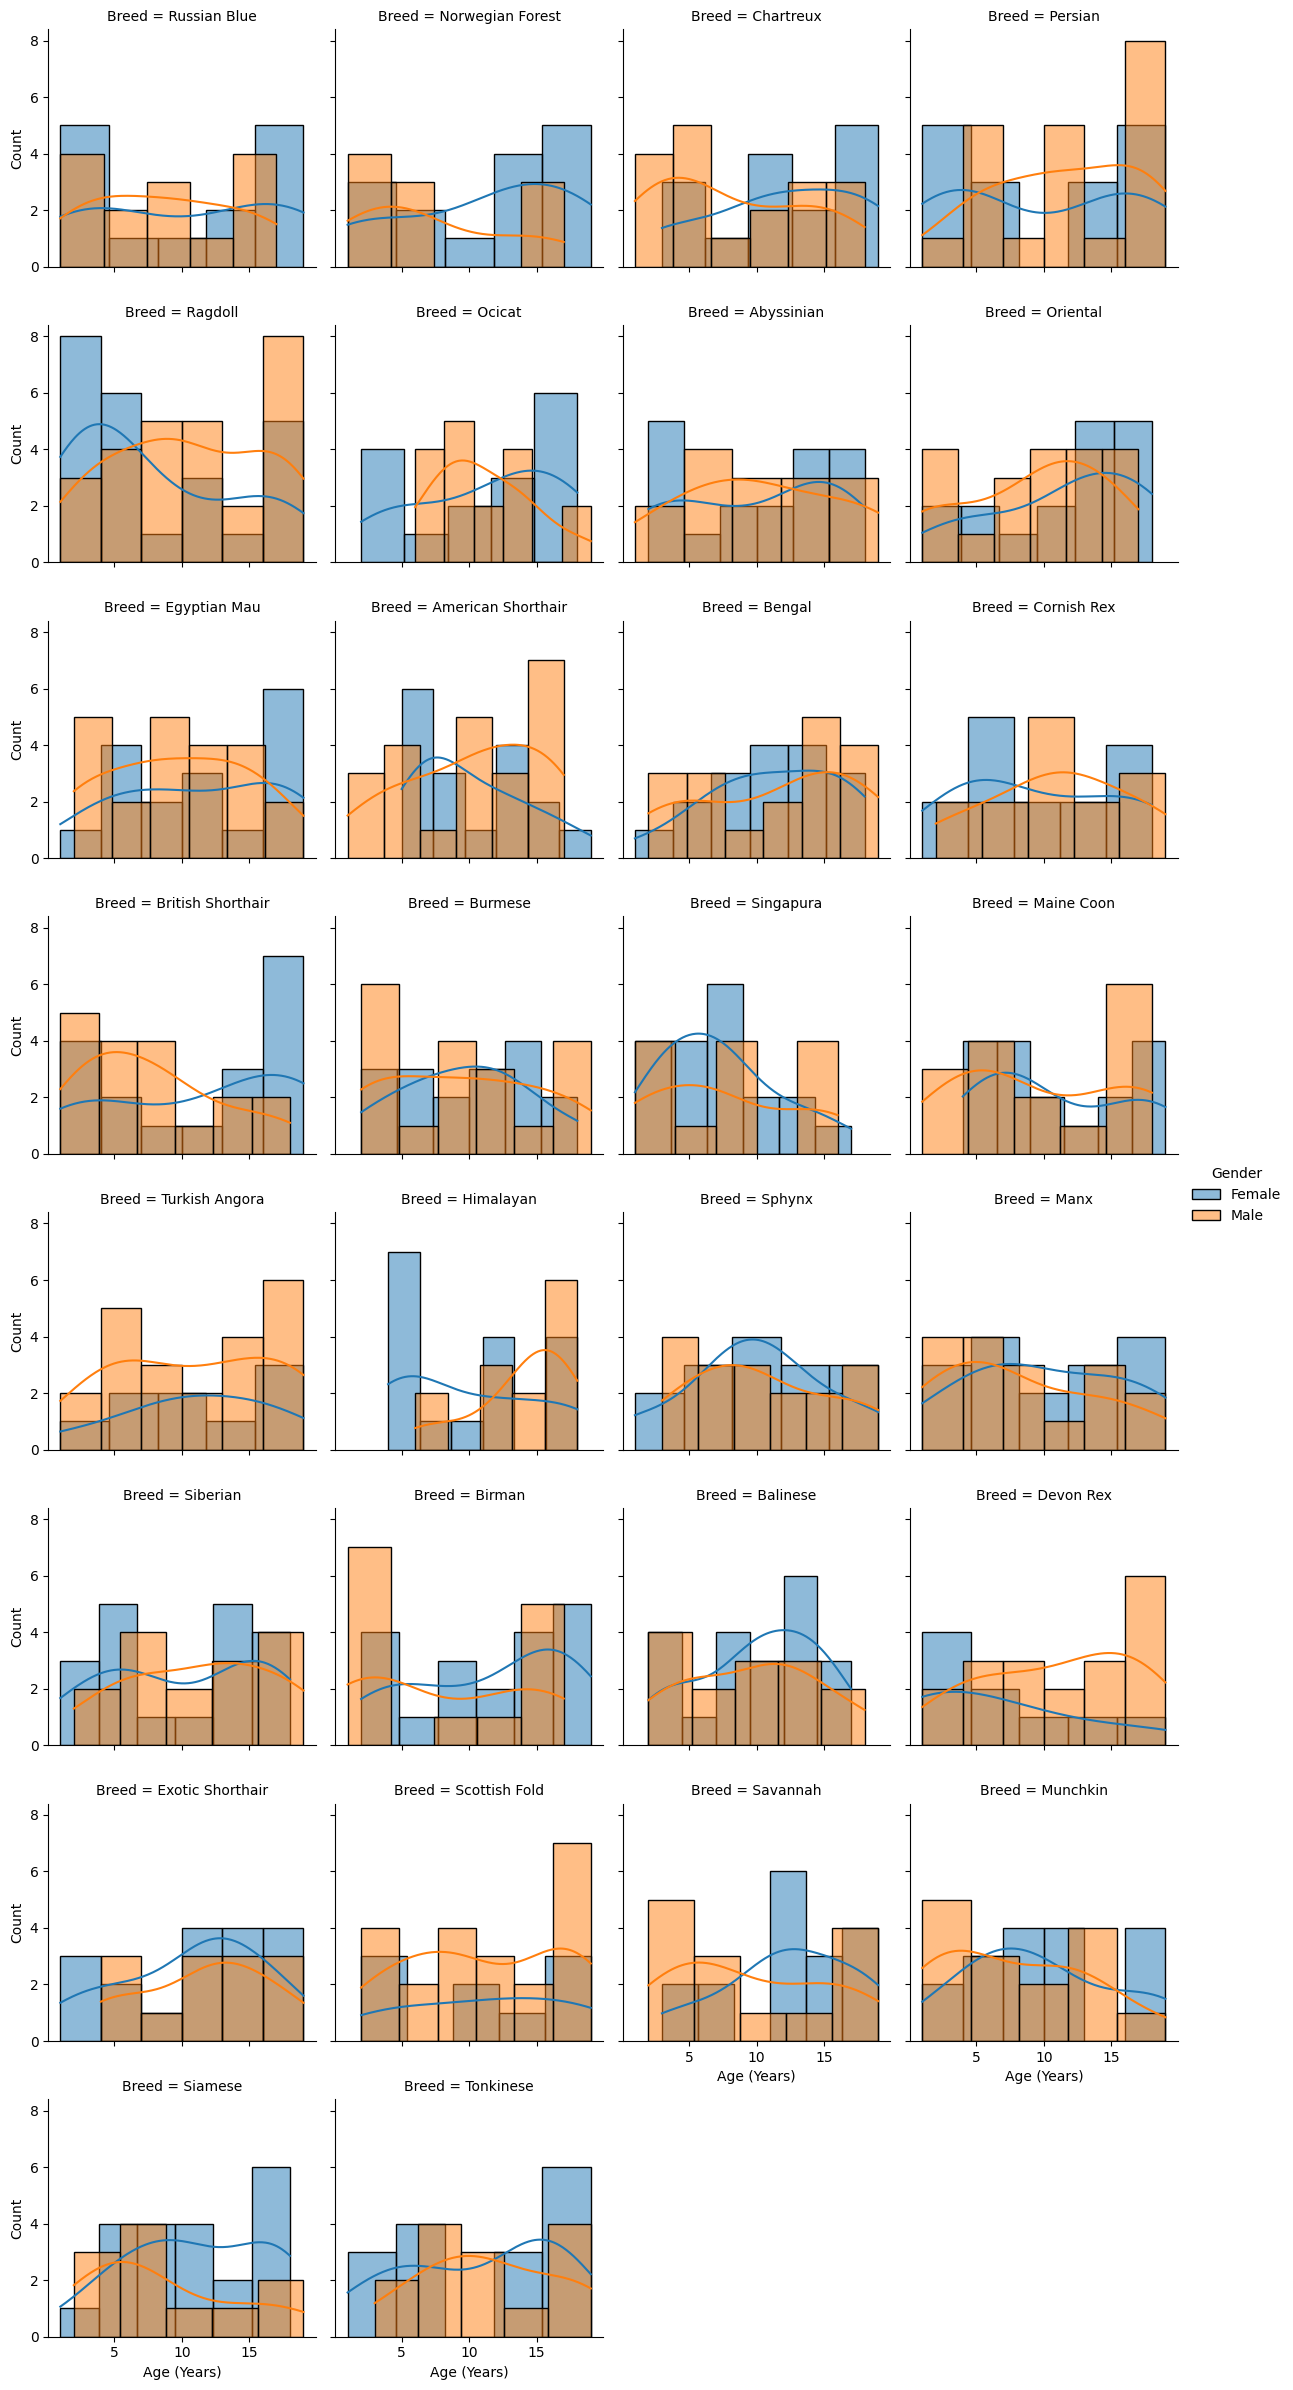

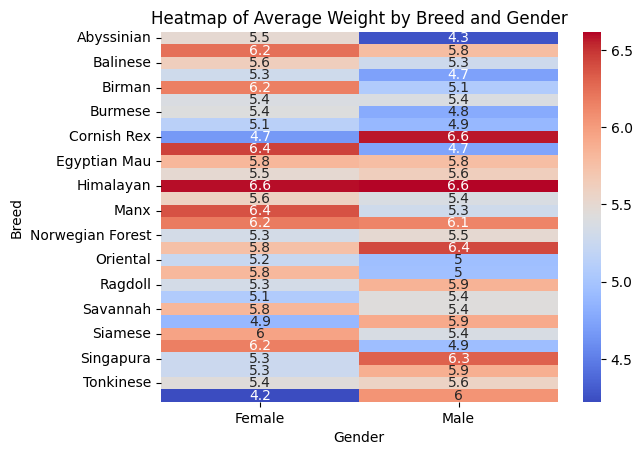

In [11]:
# facet grid for Age distribution across Breeds and Genders
g = sns.FacetGrid(df, col='Breed', hue='Gender', col_wrap=4, height=3)
g.map(sns.histplot, 'Age (Years)', kde=True)
g.add_legend()
plt.show()

# heatmap for Breed by Gender and Average Weight
pivot_table_weight = df.pivot_table(values='Weight (kg)', index='Breed', columns='Gender', aggfunc='mean')
sns.heatmap(pivot_table_weight, annot=True, cmap='coolwarm')
plt.title('Heatmap of Average Weight by Breed and Gender')
plt.show()
